Разведочный анализ данных (EDA) для датасета Car Price Prediction

In [59]:
import pandas as pd
import matplotlib as plt
from matplotlib import pyplot
import seaborn as sns
import numpy as np
import pickle

Загрузка данных и знакомство с ними 

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vijayaadithyanvg/car-price-predictionused-cars")

print("Path to dataset files:", path)

Path to dataset files: /home/mainuser/.cache/kagglehub/datasets/vijayaadithyanvg/car-price-predictionused-cars/versions/1


In [4]:
#загрузка данных из CSV-файла в DataFrame pandas
df = pd.read_csv('/home/mainuser/intelligent_information_systems/data/car data.csv')

In [5]:
#первые 10 строчек датасета
df.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [6]:
#информация о наборе данных (структура)
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


Полученная информация о датасете:<br>
Всего 301 запись (автомобиль) в датасете;<br>
9 признаков;<br>
Пропущенных значений нет;<br>
Типы данных:<br>
    2 вещественных числа (float64) - (Selling_Price - цена продажи, Present_Price - текущая цена)<br>
    3 целых числа (int64) - (Year - год, Driven_kms - пробег, Owner - владельцы)<br>
    4 строковых (object): категориальные признаки - (Car_Name - марка, Fuel_Type - тип топлива, Selling_type - тип продавца {дилер, частное лицо}, Transmission - тип передачи)<br>

In [7]:
#основные статистики числовых признаков
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
# Преобразуем категориальные признаки
df['Fuel_Type'] = df['Fuel_Type'].astype('category')
df['Selling_type'] = df['Selling_type'].astype('category')
df['Transmission'] = df['Transmission'].astype('category')
df['Car_Name'] = df['Car_Name'].astype('category')

# Оптимизируем числовые признаки
df['Year'] = df['Year'].astype('int16')
df['Driven_kms'] = df['Driven_kms'].astype('int32')
df['Owner'] = df['Owner'].astype('int8')
df['Selling_Price'] = df['Selling_Price'].astype('float32')
df['Present_Price'] = df['Present_Price'].astype('float32')

In [9]:
#анализ категориальных признаков
df.describe(include=['category'])

,Car_Name,Fuel_Type,Selling_type,Transmission
count,301,301,301,301
unique,98,3,2,2
top,city,Petrol,Dealer,Manual
freq,26,239,195,261


In [26]:
cat_features = df.select_dtypes(include=['category']).columns.to_list()
cat_features

['Car_Name', 'Fuel_Type', 'Selling_type', 'Transmission']

In [27]:
for col in cat_features:
    print(f'Unique categories in {col}: {df[col].value_counts()}')

Unique categories in Car_Name: Car_Name
city             26
corolla altis    16
verna            14
fortuner         11
brio             10
                 ..
ignis             1
omni              1
land cruiser      1
s cross           1
vitara brezza     1
Name: count, Length: 98, dtype: int64
Unique categories in Fuel_Type: Fuel_Type
Petrol    239
Diesel     60
Name: count, dtype: int64
Unique categories in Selling_type: Selling_type
Dealer        193
Individual    106
Name: count, dtype: int64
Unique categories in Transmission: Transmission
Manual       259
Automatic     40
Name: count, dtype: int64


Очистка данных

In [13]:
#проверка количества владельцев
print(f"Владельцы: {df['Owner'].value_counts().sort_index()}")

Владельцы: Owner
0    290
1     10
3      1
Name: count, dtype: int64


То есть по анализу владельцев:<br>
290 автомобилей - от первого владельца (0 предыдущих владельцев)<br>
10 автомобилей - от второго владельца (1 предыдущий владелец)<br>
1 автомобиль - от четвертого владельца (3 предыдущих владельца)

In [ ]:
#добавление нового бинарного признака в датасет (первый / непервый владелец), 
# так как число владельцев с критерием > 0 очень мало
df['First_owner'] = (df['Owner'] == 0).astype(int)
#удаление старого признака Owner, так как слишком мало примеров для 1 и 3 владельцев
df = df.drop('Owner', axis=1)

In [17]:
#удаление автомобилей с типом топлива CNG (газ), так как их число очень мало
df = df[df['Fuel_Type'] != 'CNG']
#удаление неиспользуемой категории CNG (газ)
df['Fuel_Type'] = df['Fuel_Type'].cat.remove_unused_categories()

In [18]:
#проверка удаления категории топлива газ
df['Fuel_Type'].value_counts()

Fuel_Type
Petrol    239
Diesel     60
Name: count, dtype: int64

In [19]:
#проверка обновления датасета
df.columns.tolist()

['Car_Name',
 'Year',
 'Selling_Price',
 'Present_Price',
 'Driven_kms',
 'Fuel_Type',
 'Selling_type',
 'Transmission',
 'First_owner']

Анализ признаков модели

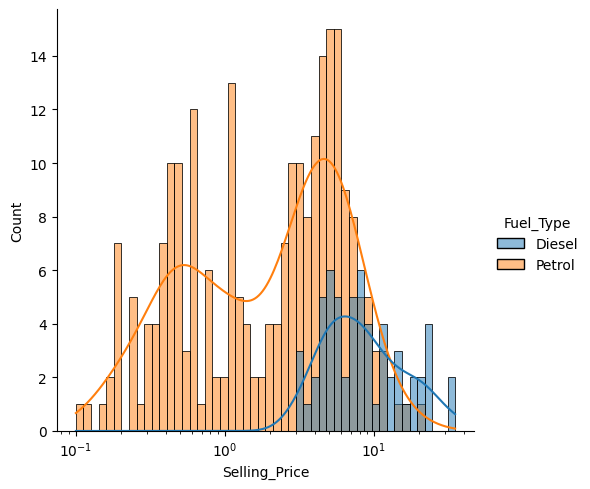

In [109]:
#график распределения цены продажи от типа топлива, логарифмическая шкала
sns.displot(df, x='Selling_Price', bins=50, hue='Fuel_Type', kde=True, log_scale=True)
# Сохраняем график
pyplot.savefig('/home/mainuser/intelligent_information_systems/eda/price_distribution_by_fuel_type.png', dpi=150, bbox_inches='tight')
pyplot.show()

Выводы:<br>
Дизельные модели в среднем значительно дороже бензиновых<br>
Бензиновые автомобили охватывают весь рынок, тогда как дизельные занимают преимущественно средний и премиальный сегменты<br>
Машины на бензине значительно превышают количество машин на дизеле

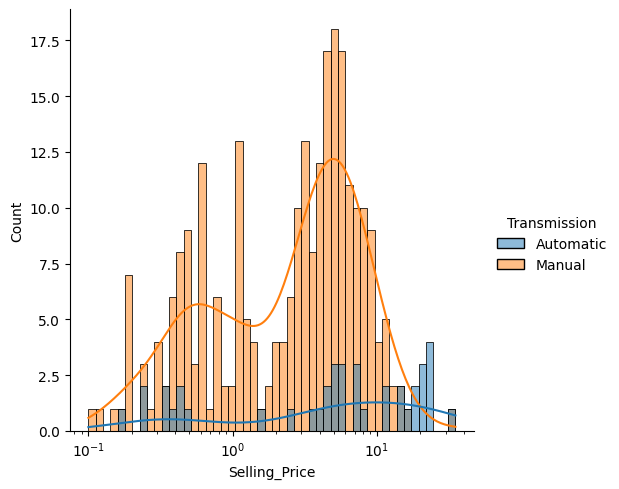

In [110]:
#график распределения цены продажи от типо передачи
sns.displot(df, x='Selling_Price', bins=50, hue='Transmission', kde=True, log_scale=True)
# Сохраняем график
pyplot.savefig('/home/mainuser/intelligent_information_systems/eda/price_distribution_by_Transmission.png', dpi=150, bbox_inches='tight')
pyplot.show()

Выводы:<br>
минимальная цена автомобилей на автомате заметно выше, чем у автомобилей с МКПП<br>
количество автомобилей на автомате в датасете намного меньше, чем с МКПП

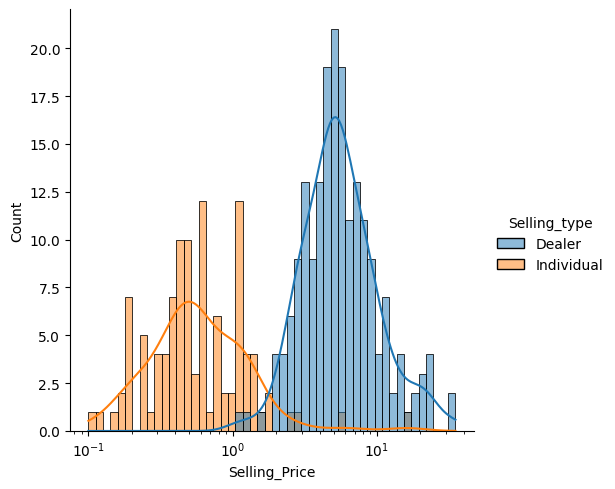

In [111]:
#график распределения цены продажи от типа продавца
sns.displot(df, x='Selling_Price', bins=50, hue='Selling_type', kde=True, log_scale=True)
# Сохраняем график
pyplot.savefig('/home/mainuser/intelligent_information_systems/eda/price_distribution_by_Selling_type.png', dpi=150, bbox_inches='tight')
pyplot.show()

Выводы:<br>
Дилеры преобладают по количеству от частных<br>
Частные продавцы сосредоточены на более доступных автомобилях (стоимость меньше)

In [ ]:
#график распределения цены продажи от того, является ли владелец одним
sns.displot(df, x='Selling_Price', bins=50, hue='First_owner', kde=True, log_scale=True)
# Сохраняем график
pyplot.savefig('/home/mainuser/intelligent_information_systems/eda/price_distribution_by_Selling_type.png', dpi=150, bbox_inches='tight')
pyplot.show()

Выводы:<br>
График информативен для первых владельцев, но для владельцев больше 1 - нет. Сам критерий является важным в жизни<br>
Ввиду того, что количество владельцев > 1 совсем мало, этот критерий можно убрать из рассмотрения. Не помогла даже бинаризация для улучшения ситуации.<br>
Так как я узнала что нужно сохранить все графики после того как удалила некоторые признаки, то некоторых картинок не будет

In [24]:
#удаление признака с владельцами из датасета
df = df.drop('First_owner', axis=1)
#проверка удаления
print(df.columns.tolist())

['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Fuel_Type', 'Selling_type', 'Transmission']


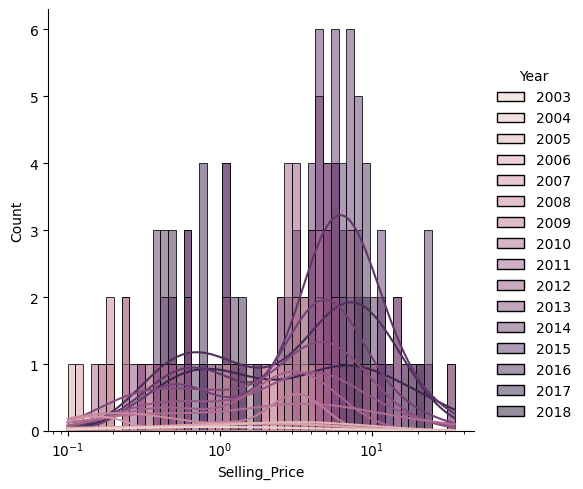

In [ ]:
#график распределения цены продажи от года выпуска
sns.displot(df, x='Selling_Price', bins=50, hue='Year', kde=True, log_scale=True)

График неинформативен, разделим на группы по годам:

In [33]:
df['Year_Category'] = pd.cut(df['Year'], 
                            bins=[2002, 2010, 2015, 2018],  # от реального минимума
                            labels=['2003-2010', '2011-2015', '2016-2018'])

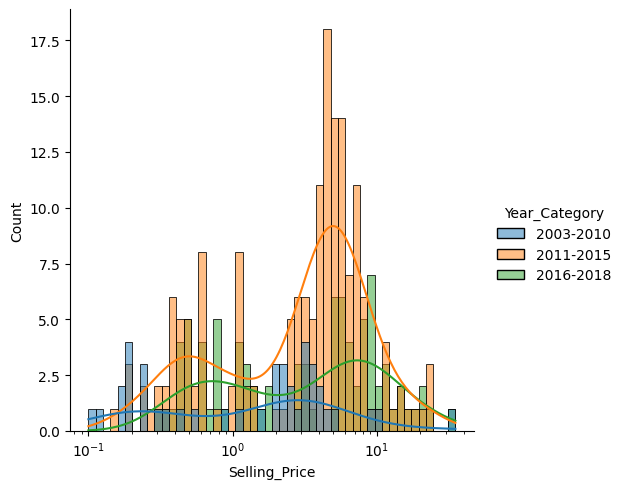

In [113]:
sns.displot(df, x='Selling_Price', bins=50, hue='Year_Category', kde=True, log_scale=True)
# Сохраняем график
pyplot.savefig('/home/mainuser/intelligent_information_systems/eda/price_distribution_by_Year_Category.png', dpi=150, bbox_inches='tight')
pyplot.show()

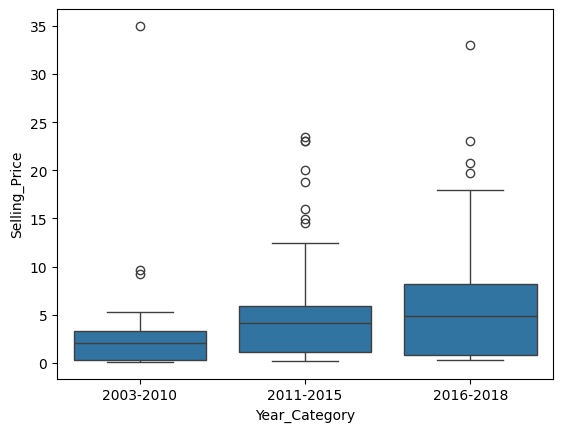

In [ ]:
# Диапазон годов
sns.boxplot(data=df, x='Year_Category', y='Selling_Price')
# Сохраняем график
pyplot.savefig('/home/mainuser/intelligent_information_systems/eda/price_by_year_category_boxplot.png', dpi=150, bbox_inches='tight')
pyplot.show()

Выводы:<br>
Чем новее автомобиль, тем выше его цена (ожидаемо)<br>
Наибольшее количество сделок приходится на автомобили 2011-2015 годов выпуска (1 график)<br>
Каждая возрастная категория занимает свой четкий ценовой сегмент<br>
Наблюдается четкая зависимость - с возрастом автомобили теряют в стоимости

In [ ]:
#удаление исходного числового признака года
df = df.drop('Year', axis=1)

In [38]:
#проверка удаления
print(df.columns.tolist())

['Car_Name', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Fuel_Type', 'Selling_type', 'Transmission', 'Year_Category']


In [42]:
df['Year_Category'] = df['Year_Category'].astype('category') #теперь это категориальный признак

In [ ]:
#меняю
cat_features = df.select_dtypes(include=['category']).columns.to_list()
cat_features

['Car_Name', 'Fuel_Type', 'Selling_type', 'Transmission', 'Year_Category']

In [40]:
num_features = df.select_dtypes(include=['number']).columns.to_list()
num_features

['Selling_Price', 'Present_Price', 'Driven_kms']

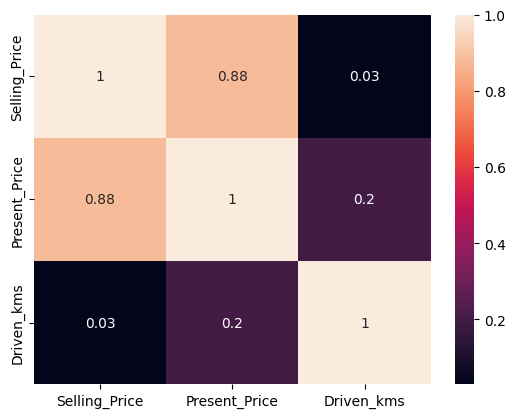

In [115]:
#корреляционная матрица числовых признаков
feature_correlation = df[num_features].corr()
sns.heatmap(feature_correlation, annot=True)
# Сохраняем график
pyplot.savefig('/home/mainuser/intelligent_information_systems/eda/correlation_matrix.png', dpi=150, bbox_inches='tight')
pyplot.show()

Present_Price - самый важный признак для прогнозирования Selling_Price - сильная корреляция<br>
Driven_kms слабо коррелирует с ценой, что неожиданно<br>
Перейдем к анализу категориальных признаков

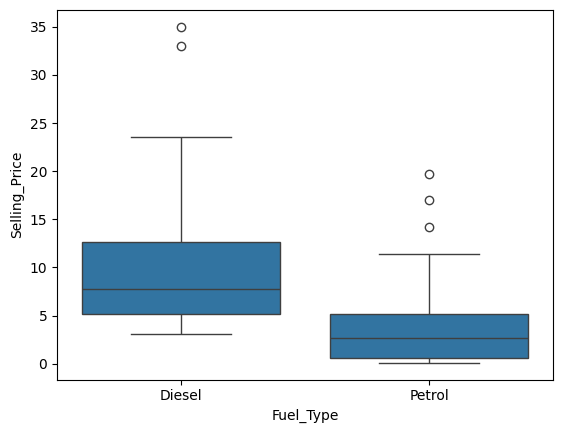

In [116]:
# Тип топлива
sns.boxplot(data=df, x='Fuel_Type', y='Selling_Price')
# Сохраняем график
pyplot.savefig('/home/mainuser/intelligent_information_systems/eda/price_by_fuel_type_boxplot.png', dpi=150, bbox_inches='tight')
pyplot.show()

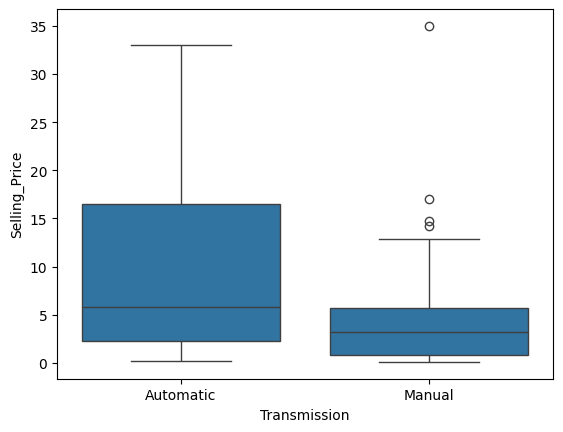

In [118]:
# Передача
sns.boxplot(data=df, x='Transmission', y='Selling_Price')
# Сохраняем график
pyplot.savefig('/home/mainuser/intelligent_information_systems/eda/price_by_Transmission_boxplot.png', dpi=150, bbox_inches='tight')
pyplot.show()

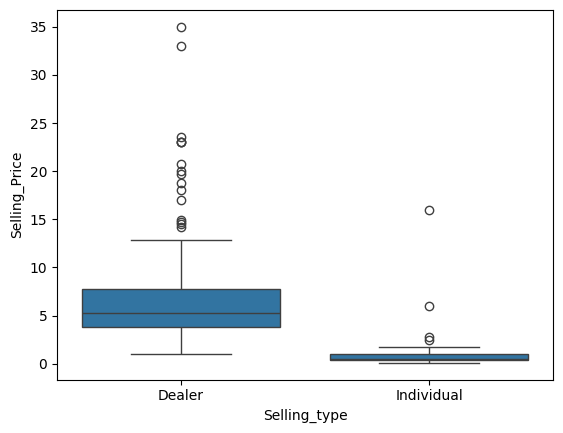

In [119]:
# Тип продавца
sns.boxplot(data=df, x='Selling_type', y='Selling_Price')
# Сохраняем график
pyplot.savefig('/home/mainuser/intelligent_information_systems/eda/price_by_Selling_type_boxplot.png', dpi=150, bbox_inches='tight')
pyplot.show()

Видим много выбросов у Дилеров - премиальные авто

<Axes: xlabel='Car_Name', ylabel='Selling_Price'>

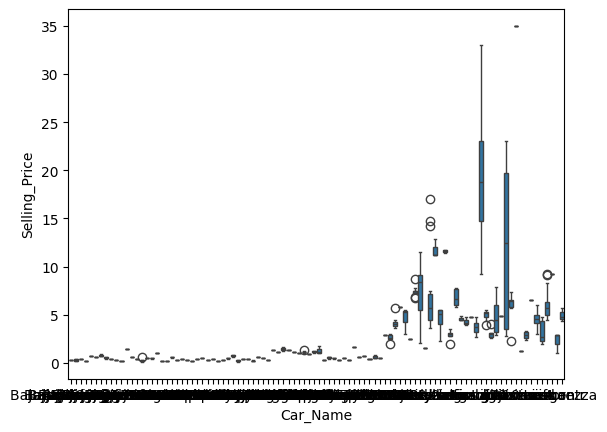

In [55]:
# Марка
sns.boxplot(data=df, x='Car_Name', y='Selling_Price')

Неинформативно - попробуем так проанализировать:

In [ ]:
#анализ топ-15 самых популярных марок
top_n = 15
top_cars = df['Car_Name'].value_counts().head(top_n).index
df_top15 = df[df['Car_Name'].isin(top_cars)].copy()
df_top15['Car_Name'] = df_top15['Car_Name'].astype('object')
# Горизонтальный boxplot только с топ-15 марками
pyplot.figure(figsize=(12, 10))
sns.boxplot(data=df_top15, 
            y='Car_Name', x='Selling_Price', orient='h')
pyplot.title(f'Распределение цен для топ-{top_n} самых популярных марок', fontsize=14)
pyplot.tight_layout()
pyplot.show()

Вывод: <br>
Наблюдается небольшой разброс цен внутри большинства марок<br>
innova и fortuner- самый широких разброс цен<br>
Самые популярные марки стоят не так дорого - в основном все в нижнем ценовом сегменте<br>
Далее преобразуем данную категорию для более лучшего анализа

In [ ]:
#анализируем распределение марок по частоте
car_frequency = df['Car_Name'].value_counts()
print("Распределение марок по частоте:")
print(car_frequency.describe())

#определяем границы для категорий
total_cars = len(df)
print(f"\nВсего автомобилей: {total_cars}")

# Создаем категории на основе квартилей или фиксированных порогов
frequency_threshold_high = 8    # Высокая частота
frequency_threshold_medium = 3  # Средняя частота
# Менее 3 - низкая частота

# Создаем новую категориальную переменную
def categorize_car_frequency(car_name, freq_series):
    freq = freq_series[car_name]
    if freq >= frequency_threshold_high:
        return 'High_Frequency_Name'
    elif freq >= frequency_threshold_medium:
        return 'Medium_Frequency_Name'
    else:
        return 'Frequency_Name'

# Применяем категоризацию
df['Car_Frequency_Category'] = df['Car_Name'].apply(
    lambda x: categorize_car_frequency(x, car_frequency)
)

# Преобразуем в категориальный тип
df['Car_Frequency_Category'] = df['Car_Frequency_Category'].astype('category')
#удаление исходного признака марки
df = df.drop('Car_Name', axis=1)

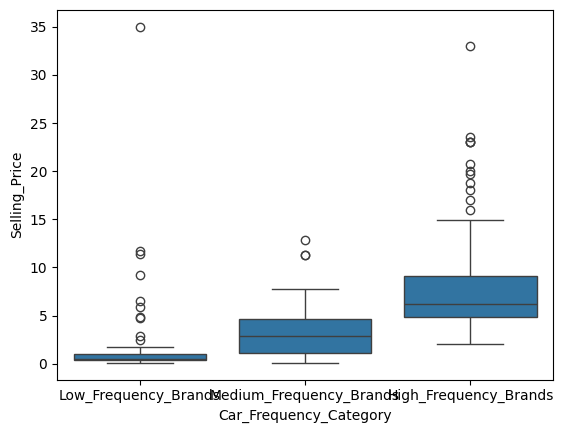

In [121]:
# Марка
sns.boxplot(data=df, x='Car_Frequency_Category', y='Selling_Price')
# Сохраняем график
pyplot.savefig('/home/mainuser/intelligent_information_systems/eda/price_by_Car_Frequency_Category_boxplot.png', dpi=150, bbox_inches='tight')
pyplot.show()

In [88]:
#меняю
cat_features = df.select_dtypes(include=['category']).columns.to_list()
cat_features

['Fuel_Type',
 'Selling_type',
 'Transmission',
 'Year_Category',
 'Car_Frequency_Category']

Групповые операции

In [ ]:
#функция для обработки мультииндекса
def flat_index(df_stats): 
    df_stats.columns = df_stats.columns.get_level_values(0) + '_' + df_stats.columns.get_level_values(1) 
    df_stats.columns = df_stats.columns.to_flat_index() 
    df_stats.reset_index(inplace=True) 
    return df_stats

In [ ]:
#группируем по типу топлива и агрегируем числовые признаки
aggregated_fuel = df[num_features + ['Fuel_Type']].groupby(by='Fuel_Type').agg(['mean', 'std'])
aggregated_fuel = flat_index(aggregated_fuel)
print("Статистики по типам топлива:")
display(aggregated_fuel)

/tmp/ipykernel_3952/2209082697.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aggregated_fuel = df[num_features + ['Fuel_Type']].groupby(by='Fuel_Type').agg(['mean', 'std'])


Статистики по типам топлива:


,Fuel_Type,Selling_Price_mean,Selling_Price_std,Present_Price_mean,Present_Price_std,Driven_kms_mean,Driven_kms_std
0,Diesel,10.278501,7.185159,15.814500,13.484288,50369.916667,30021.446979
1,Petrol,3.264184,3.135537,5.583556,5.287532,33528.937238,40308.984886


In [75]:
# Группируем по типу трансмиссии
aggregated_transmission = df[num_features + ['Transmission']].groupby(by='Transmission').agg(['mean', 'std'])
aggregated_transmission = flat_index(aggregated_transmission)
print("\nСтатистики по типам трансмиссии:")
display(aggregated_transmission)


Статистики по типам трансмиссии:


/tmp/ipykernel_3952/1506730016.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aggregated_transmission = df[num_features + ['Transmission']].groupby(by='Transmission').agg(['mean', 'std'])


,Transmission,Selling_Price_mean,Selling_Price_std,Present_Price_mean,Present_Price_std,Driven_kms_mean,Driven_kms_std
0,Automatic,9.420000,8.763244,15.315500,12.296228,53062.975000,81797.932194
1,Manual,3.938417,3.791789,6.450656,7.308861,34413.482625,26449.300654


In [94]:
# Группируем по категориям года выпуска
aggregated_year = df[num_features + ['Year_Category']].groupby(by='Year_Category').agg(['mean', 'std'])
aggregated_year = flat_index(aggregated_year)
print("\nСтатистики по категориям года выпуска:")
display(aggregated_year)


Статистики по категориям года выпуска:


/tmp/ipykernel_3952/3977069079.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aggregated_year = df[num_features + ['Year_Category']].groupby(by='Year_Category').agg(['mean', 'std'])


,Year_Category,Selling_Price_mean,Selling_Price_std,Present_Price_mean,Present_Price_std,Driven_kms_mean,Driven_kms_std
0,2003-2010,2.999512,5.584567,9.999928,15.177782,80123.243902,79247.091052
1,2011-2015,4.573488,4.331861,7.498099,7.174074,37583.877907,20499.126786
2,2016-2018,5.665465,6.027380,6.786860,6.938293,14955.011628,12043.376901


In [95]:
# Группируем по категориям названий
aggregated_category = df[num_features + ['Car_Frequency_Category']].groupby(by='Car_Frequency_Category').agg(['mean', 'std'])
aggregated_category = flat_index(aggregated_category)
print("\nСтатистики по категориям названий:")
display(aggregated_category)


Статистики по категориям названий:


/tmp/ipykernel_3952/4003107848.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aggregated_category = df[num_features + ['Car_Frequency_Category']].groupby(by='Car_Frequency_Category').agg(['mean', 'std'])


,Car_Frequency_Category,Selling_Price_mean,Selling_Price_std,Present_Price_mean,Present_Price_std,Driven_kms_mean,Driven_kms_std
0,Low_Frequency_Brands,1.671728,4.365405,3.313086,10.762894,35288.246914,62494.662956
1,Medium_Frequency_Brands,3.305755,2.466820,5.085755,3.254852,32715.415094,20023.696190
2,High_Frequency_Brands,8.134196,5.462844,13.177589,7.581220,42048.473214,29085.543859


In [96]:
# Группируем по продавцу
aggregated_selling_type = df[num_features + ['Selling_type']].groupby(by='Selling_type').agg(['mean', 'std'])
aggregated_selling_type = flat_index(aggregated_selling_type)
print("\nСтатистики по категориям названий:")
display(aggregated_selling_type)


Статистики по категориям названий:


/tmp/ipykernel_3952/2484039239.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aggregated_selling_type = df[num_features + ['Selling_type']].groupby(by='Selling_type').agg(['mean', 'std'])


,Selling_type,Selling_Price_mean,Selling_Price_std,Present_Price_mean,Present_Price_std,Driven_kms_mean,Driven_kms_std
0,Dealer,6.759223,5.149360,10.932643,8.837045,39820.093264,24976.821896
1,Individual,0.870943,1.639367,1.635283,3.771410,31606.915094,55983.926743


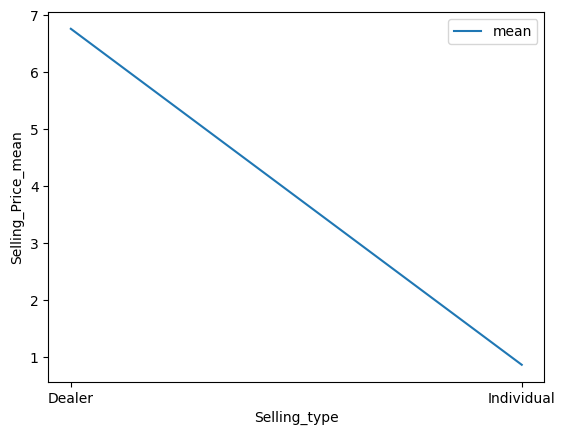

In [122]:
sns.lineplot(aggregated_selling_type,x='Selling_type',y='Selling_Price_mean', label='mean')
# Сохраняем график
pyplot.savefig('/home/mainuser/intelligent_information_systems/eda/selling_price_by_seller_type.png', dpi=150, bbox_inches='tight')
pyplot.show()

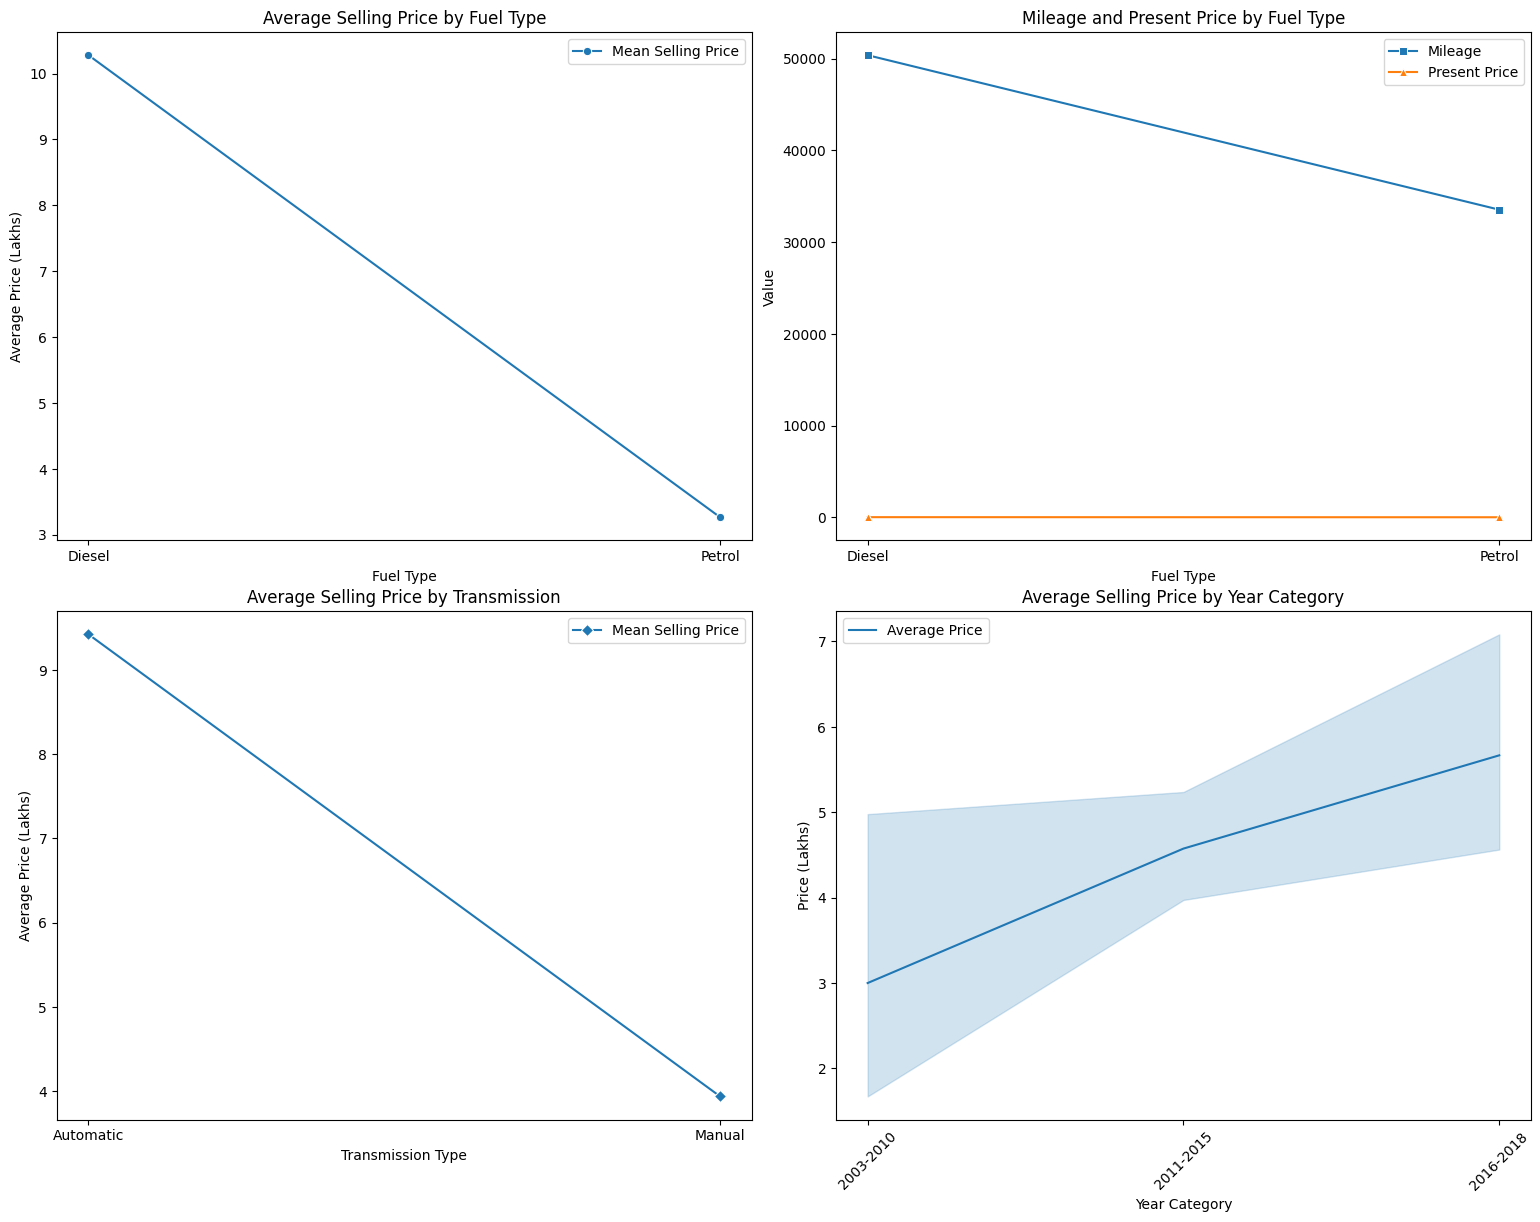

In [123]:
# Создаем subplots
fig, axs = pyplot.subplots(2, 2, figsize=(16, 12))
fig.tight_layout(pad=3.0)

# 1. Средняя цена по типу топлива
sns.lineplot(data=aggregated_fuel, x='Fuel_Type', y='Selling_Price_mean', 
             marker='o', label='Mean Selling Price', ax=axs[0,0])
axs[0,0].set_title('Average Selling Price by Fuel Type')
axs[0,0].set_xlabel('Fuel Type')
axs[0,0].set_ylabel('Average Price (Lakhs)')

# 2. Пробег и текущая цена по типу топлива
sns.lineplot(data=aggregated_fuel, x='Fuel_Type', y='Driven_kms_mean', 
             marker='s', label='Mileage', ax=axs[0,1])
sns.lineplot(data=aggregated_fuel, x='Fuel_Type', y='Present_Price_mean', 
             marker='^', label='Present Price', ax=axs[0,1])
axs[0,1].set_title('Mileage and Present Price by Fuel Type')
axs[0,1].set_xlabel('Fuel Type')
axs[0,1].set_ylabel('Value')
axs[0,1].legend()

# 3. Средняя цена по типу трансмиссии
sns.lineplot(data=aggregated_transmission, x='Transmission', y='Selling_Price_mean',
             marker='D', label='Mean Selling Price', ax=axs[1,0])
axs[1,0].set_title('Average Selling Price by Transmission')
axs[1,0].set_xlabel('Transmission Type')
axs[1,0].set_ylabel('Average Price (Lakhs)')

# 4. Группировка непосредственно в seaborn по категориям года
sns.lineplot(data=df, x='Year_Category', y='Selling_Price', 
             estimator='mean', label='Average Price', ax=axs[1,1])
axs[1,1].set_title('Average Selling Price by Year Category')
axs[1,1].set_xlabel('Year Category')
axs[1,1].set_ylabel('Price (Lakhs)')
axs[1,1].tick_params(axis='x', rotation=45)

pyplot.savefig('/home/mainuser/intelligent_information_systems/eda/all_subplots_combined.png', 
               dpi=150, 
               bbox_inches='tight',
               facecolor='white')
pyplot.show()

Bokeh

In [101]:
!pip install bokeh

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 8.8 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.4/90.4 KB 12.3 MB/s eta 0:00:00


In [128]:
from bokeh.plotting import figure, show, save
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.io import output_notebook, output_file

output_notebook()
# Указываем файл для сохранения
output_file("/home/mainuser/intelligent_information_systems/eda/bokeh_price_vs_present_price.html")

source = ColumnDataSource(data=df.sample(frac=0.1))
p = figure(width=1000, title="Car Price vs Present Price")
p.scatter(source=source, x='Present_Price', y='Selling_Price')
hover = HoverTool(tooltips=[('Present Price', '@Present_Price'),
                            ('Selling Price', '@Selling_Price'),
                            ('Fuel Type', '@Fuel_Type'),
                            ('Transmission', '@Transmission')])

p.add_tools(hover)
p.xaxis.axis_label = 'Present Price (Lakhs)'
p.yaxis.axis_label = 'Selling Price (Lakhs)'

show(p)
save(p)

Loading BokehJS ...

'/home/mainuser/intelligent_information_systems/eda/bokeh_price_vs_present_price.html'

Цены продажи близки к текущим ценам<br>
но есть случаи, где автомобили продавались дешевле текущей стоимости

In [130]:
#Scatter plot с цветовым кодированием по типу топлива
from bokeh.transform import factor_cmap
output_notebook()

output_file("/home/mainuser/intelligent_information_systems/eda/bokeh_price_vs_Driven_Kilometers_by_Fuel_Type.html")
fuel_types = df['Fuel_Type'].unique().tolist()
source = ColumnDataSource(data=df.sample(frac=0.1))

p = figure(width=1000, title="Car Price vs Driven Kilometers by Fuel Type")
p.scatter(source=source, x='Driven_kms', y='Selling_Price', 
          color=factor_cmap('Fuel_Type', 'Category10_5', fuel_types),
          size=8, alpha=0.6)

hover = HoverTool(tooltips=[('Driven KM', '@Driven_kms'),
                            ('Selling Price', '@Selling_Price'),
                            ('Fuel Type', '@Fuel_Type'),
                            ('Transmission', '@Transmission'),
                            ('Year', '@Year')])

p.add_tools(hover)
p.xaxis.axis_label = 'Driven Kilometers'
p.yaxis.axis_label = 'Selling Price'
show(p)

Loading BokehJS ...

Цена выше у дизельных авто вне зависимости от пробега<br>
У авто на бензине уменьшается цена с увеличением пробега

Save clean dataset

In [106]:
# Сохраняем обработанный датафрейм с автомобилями
df.to_pickle('/home/mainuser/intelligent_information_systems/data/car_clean_data.pkl')

# Посмотрим, что изменилось
df = pd.read_pickle('/home/mainuser/intelligent_information_systems/data/car_clean_data.pkl')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 300
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Selling_Price           299 non-null    float32 
 1   Present_Price           299 non-null    float32 
 2   Driven_kms              299 non-null    int32   
 3   Fuel_Type               299 non-null    category
 4   Selling_type            299 non-null    category
 5   Transmission            299 non-null    category
 6   Year_Category           299 non-null    category
 7   Car_Frequency_Category  299 non-null    category
dtypes: category(5), float32(2), int32(1)
memory usage: 7.4 KB


Уменьшили размер почти в 3 раза (7.4 КВ против 21.3+ KB)